In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df['exports'] = df['exports'] * df['gdpp']/100

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df['health'] = df['health'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,231.803222,1373.08241,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,10956.905500,81298.56600,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,8294.797200,62459.62400,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,3551.356500,53457.26100,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,89750.520000,876667.60000,19100,1.44,76.8,2.13,12200


In [9]:
df['health'] = round(df['health'], 2)

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,231.80,1373.08241,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,10956.91,81298.56600,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,8294.80,62459.62400,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,3551.36,53457.26100,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,89750.52,876667.60000,19100,1.44,76.8,2.13,12200


# EDA

In [15]:
list(enumerate(features))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

In [16]:
plt.figure(figsize = (15,10))
features = df.columns[1:]

<Figure size 1080x720 with 0 Axes>

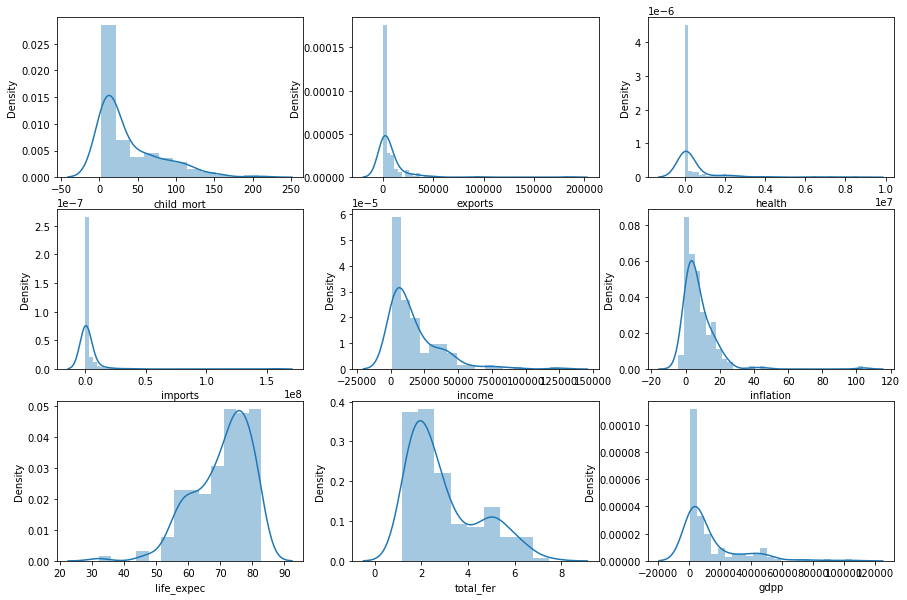

In [17]:
plt.figure(figsize = (15,10))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

# Outlier Treatment

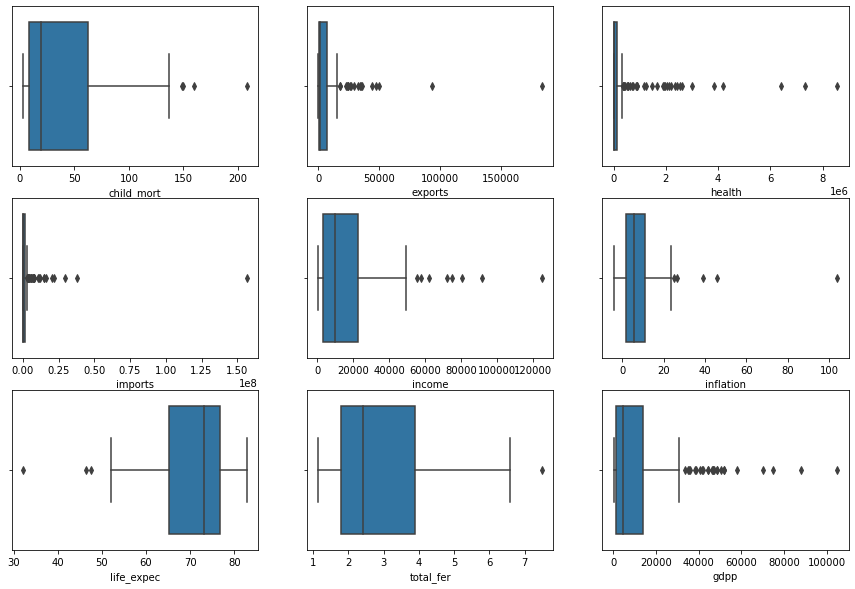

In [18]:
plt.figure(figsize = (15,10))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

In [19]:
q1 = df['child_mort'].quantile(0.01)

df['child_mort'][df['child_mort']<=q1] = q1

In [20]:

q4 = df['exports'].quantile(0.99)

df['exports'][df['exports']>=q4] = q4

In [21]:
q4 = df['health'].quantile(0.99)

df['health'][df['health']>=q4] = q4

In [22]:
q4 = df['imports'].quantile(0.99)

df['imports'][df['imports']>=q4] = q4

In [23]:
q4 = df['income'].quantile(0.99)

df['income'][df['income']>=q4] = q4

In [24]:
q4 = df['inflation'].quantile(0.99)

df['inflation'][df['inflation']>=q4] = q4

In [25]:
q4 = df['total_fer'].quantile(0.99)

df['total_fer'][df['total_fer']>=q4] = q4

In [26]:
q4 = df['gdpp'].quantile(0.99)

df['gdpp'][df['gdpp']>=q4] = q4

# Clustering

In [28]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
hopkins(df.drop('country',axis = 1))

0.88968576641322

In [30]:
df1 = df.drop ('country', axis = 1)

In [31]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [32]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.381659,-0.391992,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538993,-0.473858,-0.371979,-0.377081,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.374382,-0.380596,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007831,-0.381249,-0.378663,-0.382275,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695682,-0.086742,-0.300866,-0.228698,0.125254,-0.764618,0.704258,-0.543736,-0.032042


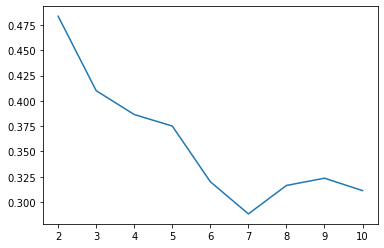

In [33]:
# Let's find out the value of K
# Silhouette Score
# Elbow Curve

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

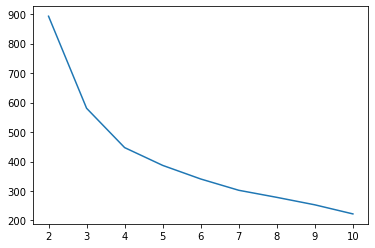

In [34]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [35]:
# K=3
kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=101)

In [36]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [37]:
df.kmean = df.copy()

In [38]:
df.kmean = pd.concat([df.kmean, label ], axis =1)

In [39]:
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,231.80,1373.08241,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,10956.91,81298.56600,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,8294.80,62459.62400,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,3551.36,53457.26100,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,89750.52,876667.60000,19100.0,1.44,76.8,2.13,12200.0,1


In [40]:
# How many datapoints we have in each cluster
df.kmean.label.value_counts()

1    95
2    48
0    24
Name: label, dtype: int64

<AxesSubplot:xlabel='child_mort', ylabel='income'>

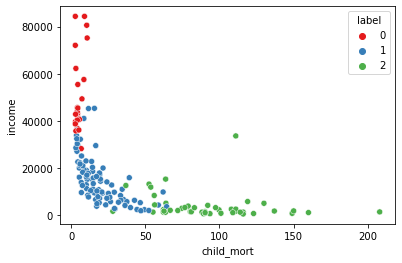

In [41]:
# Plot child_mort vs income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df.kmean, palette = 'Set1')

<AxesSubplot:xlabel='child_mort', ylabel='gdpp'>

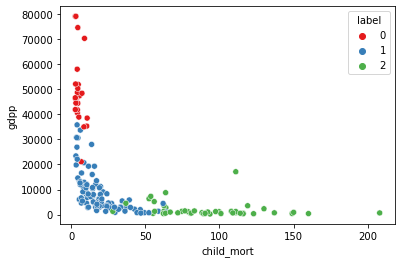

In [42]:
# Plot child_mort vs gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df.kmean, palette = 'Set1')

<AxesSubplot:xlabel='gdpp', ylabel='income'>

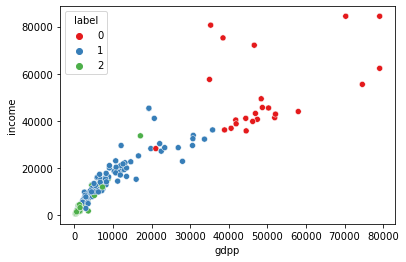

In [43]:
# Plot income vs gdpp
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df.kmean, palette = 'Set1')

In [44]:
# Cluster Profiling: GDP CHILD MORT INCOME
df.kmean.drop('country',axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,5.162500,28299.434167,2.470318e+06,1.203312e+07,50922.833333,3.258000,80.416667,1.786667,49232.333333
1,19.685263,3900.004195,1.164081e+05,6.274014e+05,14799.894737,6.791758,73.782105,2.208526,9022.863158
2,91.610417,879.063521,6.511351e+03,5.681803e+04,3897.354167,10.608604,59.239583,4.972233,1909.208333


<AxesSubplot:xlabel='label'>

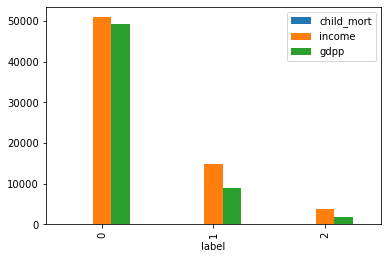

In [45]:
df.kmean.drop(['country', 'exports', 'health','imports','inflation','life_expec','total_fer'],axis = 1).groupby('label').mean().plot(kind = 'bar')

In [46]:
df.kmean[df.kmean['label'] ==0]['country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
114                  Norway
123                   Qatar
133               Singapore
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [47]:
df.kmean[df.kmean['label'] ==0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
82,Kuwait,10.8,25679.5,389831.75,4506040.0,75200.0,11.20,78.2,2.21,38500.0,0
23,Brunei,10.5,23792.2,353889.56,3489052.0,80600.0,16.70,77.1,1.84,35300.0,0
123,Qatar,9.0,43796.9,894518.29,11762174.2,84374.0,6.98,79.5,2.07,70300.0,0
157,United Arab Emirates,8.6,27195.0,448350.00,7791000.0,57600.0,12.50,76.5,1.87,35000.0,0
159,United States,7.3,6001.6,4193182.40,3701244.8,49400.0,1.22,78.7,1.93,48400.0,0


# Hierarchial

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

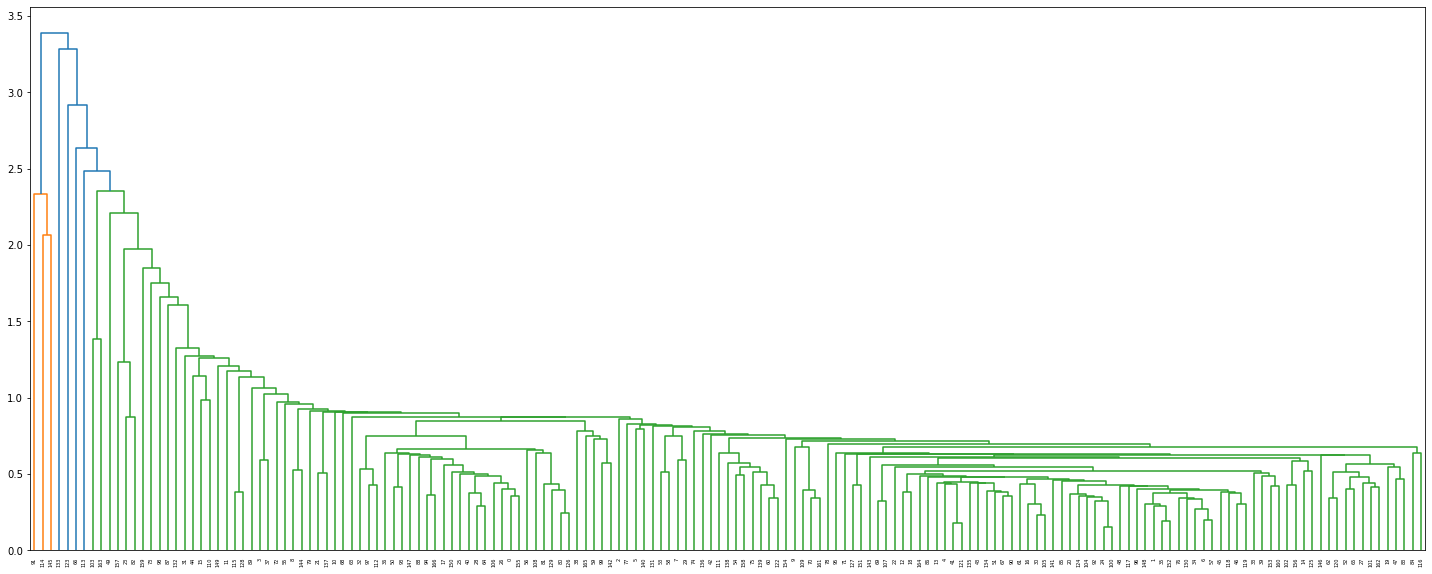

In [49]:
mergings_s = linkage(df1, method = "single", metric='euclidean')
fig = plt.figure(figsize=(25, 10))
dendrogram(mergings_s)
plt.show()

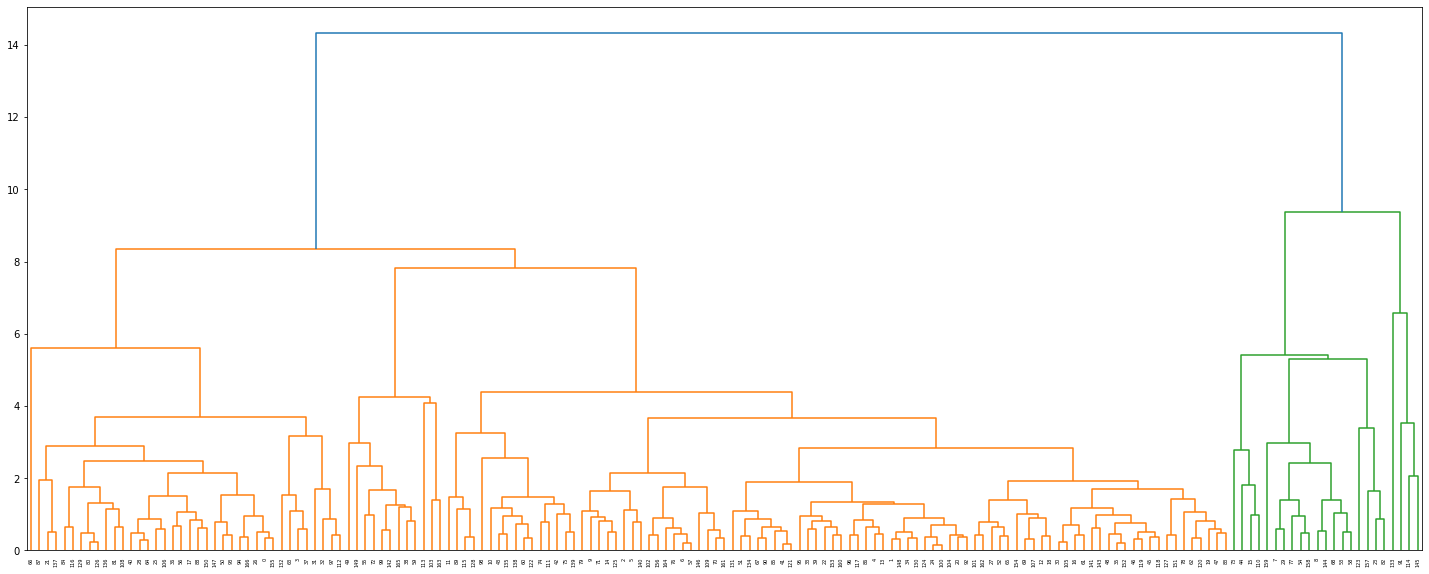

In [50]:
mergings_s = linkage(df1, method = "complete", metric='euclidean')
fig = plt.figure(figsize=(25, 10))
dendrogram(mergings_s)
plt.show()